In [26]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sys
sys.path.append('/Users/samuele/University/2.DM2/DataMining-2/fma_metadata/')
import utils

from collections import defaultdict
from IPython.display import display

In [44]:
# utility function
def make_confusion_matrix( cfm, title):
    group_names = ['TN','FP','FN','TP']

    group_counts = ["{0:0.0f}".format(value) for value in
                cfm.flatten()]

    group_percentages = ["{0:.2%}".format(value) for value in
                     cfm.flatten()/np.sum(cf_matrix)]

    labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]

    labels = np.asarray(labels).reshape(2,2)
    plt.title(title)
    
    sns.heatmap(cfm, annot=labels, fmt="", cmap='Blues')
    plt.ylabel('True Label', fontsize=12)
    plt.xlabel('Predicted',fontsize=12)
    

def plot_roc_curve(y_test, prediction, name_model):
    test_fpr, test_tpr, te_thresholds = roc_curve(y_test, prediction)

    plt.grid()
    auc_score = round(auc(test_fpr, test_tpr),2)
    plt.plot(test_fpr, test_tpr, label=f"{name_model} - AUC ="+ str(auc_score))
    plt.plot([0,1],[0,1],'r--')
    plt.legend()
    plt.xlabel("True Positive Rate")
    plt.ylabel("False Positive Rate")
    plt.title(f" AUC(ROC curve) - {name_model}")
    plt.grid(color='black', linestyle='', linewidth=0.5)
    plt.show()

# Data Preparation

In [27]:
feat = utils.load('/Users/samuele/University/2.DM2/fma_metadata/features.csv')
display(feat.shape)
display(feat.head())

(106574, 518)

feature    chroma_cens                                                    \
statistics    kurtosis                                                     
number              01        02        03        04        05        06   
track_id                                                                   
2             7.180653  5.230309  0.249321  1.347620  1.482478  0.531371   
3             1.888963  0.760539  0.345297  2.295201  1.654031  0.067592   
5             0.527563 -0.077654 -0.279610  0.685883  1.937570  0.880839   
10            3.702245 -0.291193  2.196742 -0.234449  1.367364  0.998411   
20           -0.193837 -0.198527  0.201546  0.258556  0.775204  0.084794   

feature                                             ...   tonnetz            \
statistics                                          ...       std             
number            07        08        09        10  ...        04        05   
track_id                                            ...                       
2           1.481593  2.691455  0.866868  1.341231  ...  0.054125  0.012226   
3           1.366848  1.054094  0.108103  0.619185  ...  0.063831  0.014212   
5          -0.923192 -0.927232  0.666617  1.038546  ...  0.040730  0.012691   
10          1.770694  1.604566  0.521217  1.982386  ...  0.074358  0.017952   
20         -0.289294 -0.816410  0.043851 -0.804761  ...  0.095003  0.022492   

feature                     zcr                                          \
statistics             kurtosis       max      mean    median       min   
number            06         01        01        01        01        01   
track_id                                                                  
2           0.012111   5.758890  0.459473  0.085629  0.071289  0.000000   
3           0.017740   2.824694  0.466309  0.084578  0.063965  0.000000   
5           0.014759   6.808415  0.375000  0.053114  0.041504  0.000000   
10          0.013921  21.434212  0.452148  0.077515  0.071777  0.000000   
20          0.021355  16.669037  0.469727  0.047225  0.040039  0.000977   

feature                         
statistics      skew       std  
number            01        01  
track_id                        
2           2.089872  0.061448  
3           1.716724  0.069330  
5           2.193303  0.044861  
10          3.542325  0.040800  
20          3.189831  0.030993  

[5 rows x 518 columns]

In [28]:
happiness = pd.read_csv('/Users/samuele/University/2.DM2/fma_metadata/song_happiness_labels.csv')
display(happiness.head())
display(happiness.shape)

,track_id,valence
0,2,happy
1,3,sad
2,5,happy
3,10,happy
4,134,happy


(13129, 2)

In [29]:
feat = feat.merge(happiness, on='track_id')
display(feat['valence'].value_counts())
display(feat.shape)
display(feat.head())

/Users/samuele/opt/anaconda3/lib/python3.8/site-packages/pandas/core/reshape/merge.py:643: UserWarning: merging between different levels can give an unintended result (3 levels on the left,1 on the right)
  warnings.warn(msg, UserWarning)


sad      7724
happy    5405
Name: valence, dtype: int64

(13129, 520)

,track_id,"(chroma_cens, kurtosis, 01)","(chroma_cens, kurtosis, 02)","(chroma_cens, kurtosis, 03)","(chroma_cens, kurtosis, 04)","(chroma_cens, kurtosis, 05)","(chroma_cens, kurtosis, 06)","(chroma_cens, kurtosis, 07)","(chroma_cens, kurtosis, 08)","(chroma_cens, kurtosis, 09)",...,"(tonnetz, std, 05)","(tonnetz, std, 06)","(zcr, kurtosis, 01)","(zcr, max, 01)","(zcr, mean, 01)","(zcr, median, 01)","(zcr, min, 01)","(zcr, skew, 01)","(zcr, std, 01)",valence
0,2,7.180653,5.230309,0.249321,1.347620,1.482478,0.531371,1.481593,2.691455,0.866868,...,0.012226,0.012111,5.758890,0.459473,0.085629,0.071289,0.0,2.089872,0.061448,happy
1,3,1.888963,0.760539,0.345297,2.295201,1.654031,0.067592,1.366848,1.054094,0.108103,...,0.014212,0.017740,2.824694,0.466309,0.084578,0.063965,0.0,1.716724,0.069330,sad
2,5,0.527563,-0.077654,-0.279610,0.685883,1.937570,0.880839,-0.923192,-0.927232,0.666617,...,0.012691,0.014759,6.808415,0.375000,0.053114,0.041504,0.0,2.193303,0.044861,happy
3,10,3.702245,-0.291193,2.196742,-0.234449,1.367364,0.998411,1.770694,1.604566,0.521217,...,0.017952,0.013921,21.434212,0.452148,0.077515,0.071777,0.0,3.542325,0.040800,happy
4,134,0.918445,0.674147,0.577818,1.281117,0.933746,0.078177,1.199204,-0.175223,0.925482,...,0.016322,0.015819,4.731087,0.419434,0.064370,0.050781,0.0,1.806106,0.054623,happy


# Data Partitioning

In [30]:
from sklearn.model_selection import train_test_split, cross_val_score 

from sklearn.metrics import accuracy_score, f1_score, classification_report
from sklearn.metrics import roc_curve, auc, roc_auc_score

In [31]:
class_name = 'valence'
attributes = [col for col in feat.columns if col != class_name]
X = feat[attributes].values
y = feat[class_name]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42,stratify=y)

/Users/samuele/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


In [32]:
X_train.shape

(9190, 519)

# Random Forest

In [33]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold, GridSearchCV

In [34]:
help(RandomForestClassifier)

Help on class RandomForestClassifier in module sklearn.ensemble._forest:

class RandomForestClassifier(ForestClassifier)
 |  RandomForestClassifier(n_estimators=100, *, criterion='gini', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='auto', max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None, bootstrap=True, oob_score=False, n_jobs=None, random_state=None, verbose=0, warm_start=False, class_weight=None, ccp_alpha=0.0, max_samples=None)
 |  
 |  A random forest classifier.
 |  
 |  A random forest is a meta estimator that fits a number of decision tree
 |  classifiers on various sub-samples of the dataset and uses averaging to
 |  improve the predictive accuracy and control over-fitting.
 |  The sub-sample size is controlled with the `max_samples` parameter if
 |  `bootstrap=True` (default), otherwise the whole dataset is used to build
 |  each tree.
 |  
 |  Read more in the :ref:`User Guide <forest>`.
 |  
 |  P

In [24]:
params_list = { 
                'max_depth': [None] + list(np.arange(2, 20)),
                'min_samples_split': [2, 5, 10, 20, 30, 50, 100],
                'min_samples_leaf': [1, 5, 10, 20, 30, 50, 100],
                'criterion': ['gini', 'entropy'], 
             }

clf = RandomForestClassifier()
skfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
random_search = GridSearchCV(clf, cv=skfold,  param_grid=params_list)
random_search.fit(X_train, y_train)
clf = random_search.best_estimator_
clf.fit(X_train, y_train)


y_pred = clf.predict(X_test)

print(f"best parameters:\n{random_search.best_params_}")
print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

best parameters:
{'criterion': 'entropy', 'max_depth': 15, 'min_samples_leaf': 1, 'min_samples_split': 2}
Accuracy 0.7385123127697385
F1-score [0.65574866 0.78919361]
              precision    recall  f1-score   support

       happy       0.72      0.60      0.66      1622
         sad       0.75      0.83      0.79      2317

    accuracy                           0.74      3939
   macro avg       0.73      0.72      0.72      3939
weighted avg       0.74      0.74      0.73      3939



In [64]:
clf = RandomForestClassifier(min_samples_split=2, min_samples_leaf=1, max_depth=15, criterion='entropy')
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.7372429550647372
F1-score [0.65580313 0.78751796]
              precision    recall  f1-score   support

       happy       0.71      0.61      0.66      1622
         sad       0.75      0.83      0.79      2317

    accuracy                           0.74      3939
   macro avg       0.73      0.72      0.72      3939
weighted avg       0.73      0.74      0.73      3939



<ipython-input-36-bb44f2a6d3e1>:9: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  plt.yticks(y_ticks, np.array(attributes)[sorted_idx])


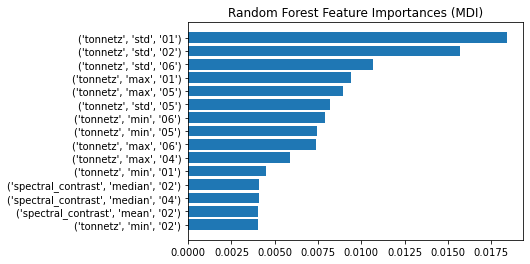

In [36]:
nbr_features = 15

tree_feature_importances = clf.feature_importances_
sorted_idx = tree_feature_importances.argsort()[-nbr_features:]

y_ticks = np.arange(0, len(sorted_idx))
fig, ax = plt.subplots()
plt.barh(y_ticks, tree_feature_importances[sorted_idx])
plt.yticks(y_ticks, np.array(attributes)[sorted_idx])
plt.title("Random Forest Feature Importances (MDI)")
plt.show()

In [37]:
from sklearn.inspection import permutation_importance

In [38]:
result = permutation_importance(clf, X_test, y_test, n_repeats=10, random_state=42)

<ipython-input-39-9d1047c37eda>:4: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  plt.boxplot(result.importances[sorted_idx].T, vert=False, labels=np.array(attributes)[sorted_idx])


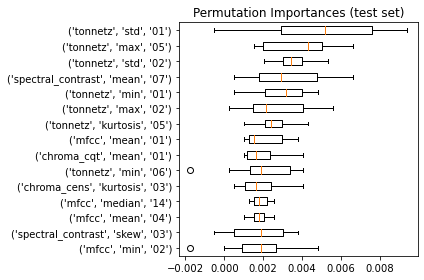

In [39]:
sorted_idx = result.importances_mean.argsort()[-nbr_features:]

fig, ax = plt.subplots()
plt.boxplot(result.importances[sorted_idx].T, vert=False, labels=np.array(attributes)[sorted_idx])
plt.title("Permutation Importances (test set)")
plt.tight_layout()
plt.show()

In [40]:
import pydotplus
from sklearn import tree
from IPython.display import Image

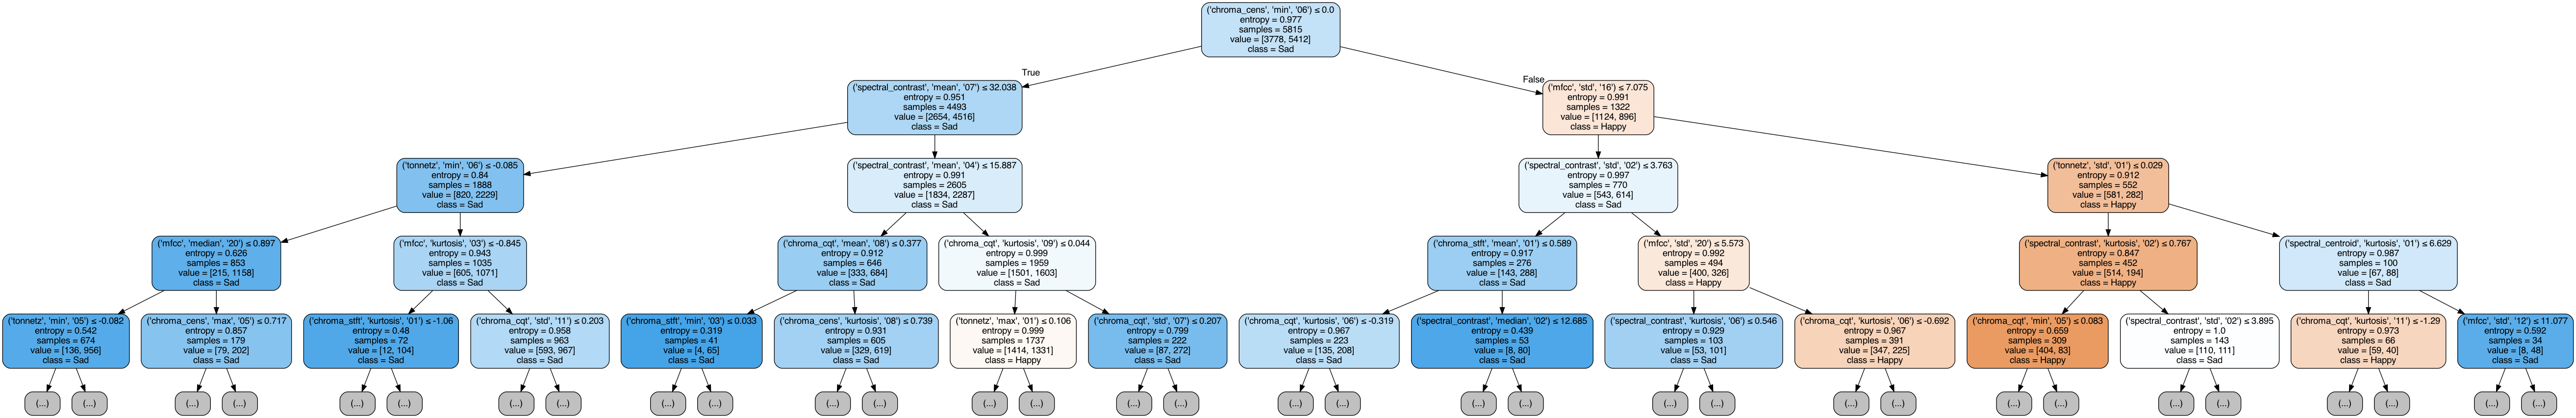

In [41]:
dot_data = tree.export_graphviz(clf.estimators_[0], out_file=None,  
                                feature_names=attributes, 
                                class_names=['Happy', 'Sad'],  
                                filled=True, rounded=True,  
                                special_characters=True, max_depth=4)  
graph = pydotplus.graph_from_dot_data(dot_data)  
Image(graph.create_png())

### ROC-AUC

In [69]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix
import seaborn as sns

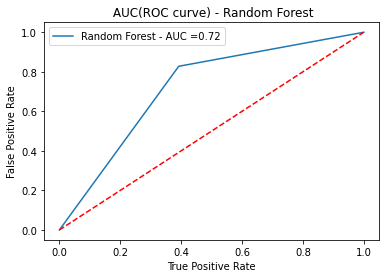

In [70]:
le = LabelEncoder()
y_test_enc = le.fit_transform(y_test).astype('bool')
y_pred_enc = le.fit_transform(y_pred).astype('bool')
plot_roc_curve(y_test_enc, y_pred_enc, 'Random Forest')

# Confusion Matrix

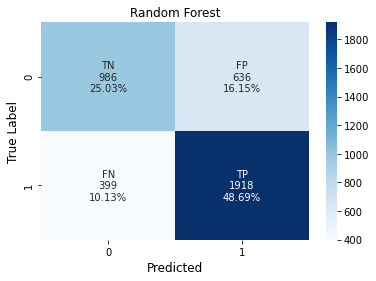

In [71]:
cf_matrix = confusion_matrix(y_test, y_pred)
make_confusion_matrix(cf_matrix, 'Random Forest')

# Bagging

In [72]:
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier

If None, then the base estimator is a decision tree.

### DecisionTree Bagging 

In [81]:
clf = BaggingClassifier(base_estimator=None, n_estimators=100, random_state=0)
clf.fit(X_train, y_train)

y_pred_dt = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred_dt))
print('F1-score %s' % f1_score(y_test, y_pred_dt, average=None))
print(classification_report(y_test, y_pred_dt))

Accuracy 0.7354658542777355
F1-score [0.65903141 0.78390709]
              precision    recall  f1-score   support

       happy       0.70      0.62      0.66      1622
         sad       0.75      0.82      0.78      2317

    accuracy                           0.74      3939
   macro avg       0.73      0.72      0.72      3939
weighted avg       0.73      0.74      0.73      3939



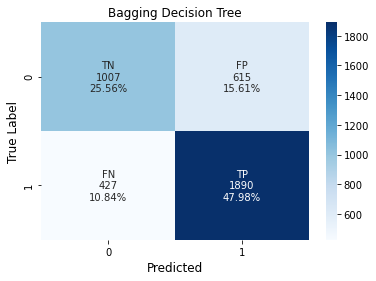

In [82]:
cf_matrix = confusion_matrix(y_test, y_pred_dt)
make_confusion_matrix(cf_matrix, 'Bagging Decision Tree')

### SVC Bagging  

In [83]:
clf = BaggingClassifier(base_estimator=SVC(C=1000), n_estimators=100, random_state=0, n_jobs=2)

clf.fit(X_train, y_train)

y_pred_svc = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred_svc))
print('F1-score %s' % f1_score(y_test, y_pred_svc, average=None))
print(classification_report(y_test, y_pred_svc))

Accuracy 0.6438182279766438
F1-score [0.44303295 0.73819742]
              precision    recall  f1-score   support

       happy       0.62      0.34      0.44      1622
         sad       0.65      0.85      0.74      2317

    accuracy                           0.64      3939
   macro avg       0.64      0.60      0.59      3939
weighted avg       0.64      0.64      0.62      3939



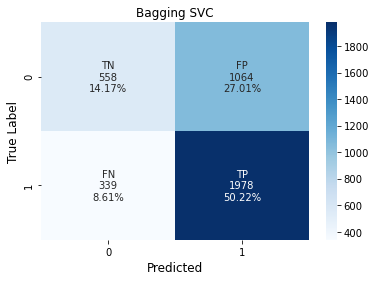

In [84]:
cf_matrix = confusion_matrix(y_test, y_pred_svc)
make_confusion_matrix(cf_matrix, 'Bagging SVC')

### Random Forest Bagging  

In [85]:
rfc = RandomForestClassifier(min_samples_split=2, min_samples_leaf=1, max_depth=19, criterion='gini')
clf = BaggingClassifier(base_estimator=rfc, n_estimators=100, random_state=0)
clf.fit(X_train, y_train)

y_pred_rf = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred_rf))
print('F1-score %s' % f1_score(y_test, y_pred_rf, average=None))
print(classification_report(y_test, y_pred_rf))

Accuracy 0.7331810104087332
F1-score [0.63920357 0.78831823]
              precision    recall  f1-score   support

       happy       0.72      0.57      0.64      1622
         sad       0.74      0.84      0.79      2317

    accuracy                           0.73      3939
   macro avg       0.73      0.71      0.71      3939
weighted avg       0.73      0.73      0.73      3939



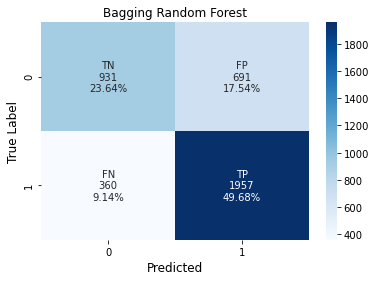

In [86]:
cf_matrix = confusion_matrix(y_test, y_pred_rf)
make_confusion_matrix(cf_matrix, 'Bagging Random Forest')

### Bagging ROC-AUC

In [102]:
le = LabelEncoder()
y_test_enc = le.fit_transform(y_test).astype('bool')
y_pred_dt_enc = le.fit_transform(y_pred_dt).astype('bool')
y_pred_svc_enc = le.fit_transform(y_pred_svc).astype('bool')
y_pred_rf_enc = le.fit_transform(y_pred_rf).astype('bool')

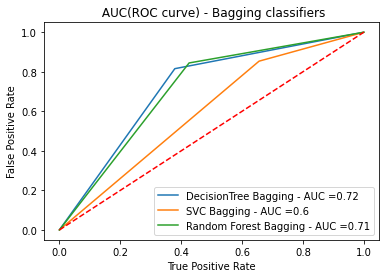

In [108]:
test_fpr_dt, test_tpr_dt, te_thresholds_dt = roc_curve(y_test_enc, y_pred_dt_enc)
test_fpr_svc, test_tpr_svc, te_thresholds_svc = roc_curve(y_test_enc, y_pred_svc_enc)
test_fpr_rf, test_tpr_rf, te_thresholds_rf = roc_curve(y_test_enc, y_pred_rf_enc)

plt.grid()

auc_score_dt = round(auc(test_fpr_dt, test_tpr_dt),2)
plt.plot(test_fpr_dt, test_tpr_dt, label=f"{'DecisionTree Bagging'} - AUC ="+ str(auc_score_dt))

auc_score_svc = round(auc(test_fpr_svc, test_tpr_svc),2)
plt.plot(test_fpr_svc, test_tpr_svc, label=f"{'SVC Bagging'} - AUC ="+ str(auc_score_svc))

auc_score_rf = round(auc(test_fpr_rf, test_tpr_rf),2)
plt.plot(test_fpr_rf, test_tpr_rf, label=f"{'Random Forest Bagging'} - AUC ="+ str(auc_score_rf))

plt.plot([0,1],[0,1],'r--')
plt.legend()
plt.xlabel("True Positive Rate")
plt.ylabel("False Positive Rate")
plt.title(f" AUC(ROC curve) - {'Bagging classifiers'}")
plt.grid(color='black', linestyle='', linewidth=0.5)
plt.show()

# Boosting

In [93]:
from sklearn.ensemble import AdaBoostClassifier

If None, then the base estimator is DecisionTreeClassifier(max_depth=1).

### DecisionTree Boosting 

In [94]:
clf = AdaBoostClassifier(base_estimator=None, n_estimators=100, random_state=0)
clf.fit(X_train, y_train)

y_pred_dt_ada = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.7331810104087332
F1-score [0.63920357 0.78831823]
              precision    recall  f1-score   support

       happy       0.72      0.57      0.64      1622
         sad       0.74      0.84      0.79      2317

    accuracy                           0.73      3939
   macro avg       0.73      0.71      0.71      3939
weighted avg       0.73      0.73      0.73      3939



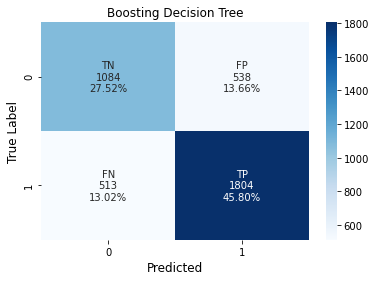

In [95]:
cf_matrix = confusion_matrix(y_test, y_pred_dt_ada)
make_confusion_matrix(cf_matrix, 'Boosting Decision Tree')

### Random Forest AdaBoost

In [112]:
rfc = RandomForestClassifier(min_samples_split=2, min_samples_leaf=1, max_depth=15, criterion='entropy')
clf = AdaBoostClassifier(base_estimator=rfc, n_estimators=100, random_state=0)
clf.fit(X_train, y_train)

y_pred_rf_ada = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.7331810104087332
F1-score [0.63920357 0.78831823]
              precision    recall  f1-score   support

       happy       0.72      0.57      0.64      1622
         sad       0.74      0.84      0.79      2317

    accuracy                           0.73      3939
   macro avg       0.73      0.71      0.71      3939
weighted avg       0.73      0.73      0.73      3939



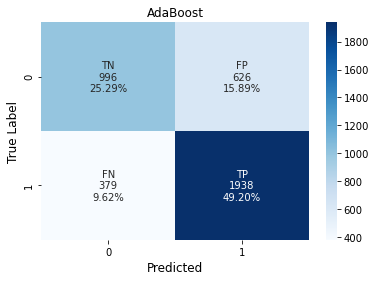

In [113]:
cf_matrix = confusion_matrix(y_test, y_pred_rf_ada)
make_confusion_matrix(cf_matrix, 'AdaBoost')

### Bagging ROC-AUC

In [114]:
y_pred_dt_ada_enc = le.fit_transform(y_pred_dt_ada).astype('bool')
y_pred_rf_ada_enc = le.fit_transform(y_pred_rf_ada).astype('bool')

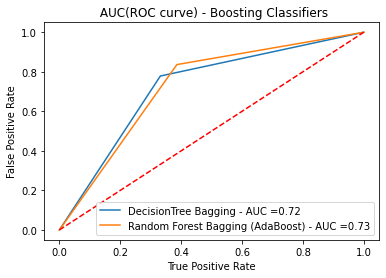

In [115]:
test_fpr_dt_ada, test_tpr_dt_ada, te_thresholds_dt_ada = roc_curve(y_test_enc, y_pred_dt_ada_enc)
test_fpr_rf_ada, test_tpr_rf_ada, te_thresholds_rf_ada = roc_curve(y_test_enc, y_pred_rf_ada_enc)

plt.grid()

auc_score_dt_ada = round(auc(test_fpr_dt_ada, test_tpr_dt_ada),2)
plt.plot(test_fpr_dt_ada, test_tpr_dt_ada, label=f"{'DecisionTree Bagging'} - AUC ="+ str(auc_score_dt_ada))

auc_score_rf_ada = round(auc(test_fpr_rf_ada, test_tpr_rf_ada),2)
plt.plot(test_fpr_rf_ada, test_tpr_rf_ada, label=f"{'Random Forest Bagging (AdaBoost)'} - AUC ="+ str(auc_score_rf_ada))

plt.plot([0,1],[0,1],'r--')
plt.legend()
plt.xlabel("True Positive Rate")
plt.ylabel("False Positive Rate")
plt.title(f" AUC(ROC curve) - {'Boosting Classifiers'}")
plt.grid(color='black', linestyle='', linewidth=0.5)
plt.show()

# Voting
## Building KNN Classifier

In [116]:
from sklearn.neighbors import KNeighborsClassifier
help(KNeighborsClassifier)

Help on class KNeighborsClassifier in module sklearn.neighbors._classification:

class KNeighborsClassifier(sklearn.neighbors._base.KNeighborsMixin, sklearn.base.ClassifierMixin, sklearn.neighbors._base.NeighborsBase)
 |  KNeighborsClassifier(n_neighbors=5, *, weights='uniform', algorithm='auto', leaf_size=30, p=2, metric='minkowski', metric_params=None, n_jobs=None, **kwargs)
 |  
 |  Classifier implementing the k-nearest neighbors vote.
 |  
 |  Read more in the :ref:`User Guide <classification>`.
 |  
 |  Parameters
 |  ----------
 |  n_neighbors : int, default=5
 |      Number of neighbors to use by default for :meth:`kneighbors` queries.
 |  
 |  weights : {'uniform', 'distance'} or callable, default='uniform'
 |      weight function used in prediction.  Possible values:
 |  
 |      - 'uniform' : uniform weights.  All points in each neighborhood
 |        are weighted equally.
 |      - 'distance' : weight points by the inverse of their distance.
 |        in this case, closer ne

In [117]:
#parameters to tune
leaf_size = list(range(1,50))
n_neighbors = list(range(1,30))
hyperparameters = dict(leaf_size=leaf_size, n_neighbors=n_neighbors)

In [118]:
knn = KNeighborsClassifier()
clf_eucliean = RandomizedSearchCV(knn, hyperparameters, cv=10)
euclidean = clf_eucliean.fit(X_train, y_train)
print('Best leaf_size:', euclidean.best_estimator_.get_params()['leaf_size'])
print('Best p:', euclidean.best_estimator_.get_params()['p'])
print('Best n_neighbors:', euclidean.best_estimator_.get_params()['n_neighbors'])

Best leaf_size: 45
Best p: 2
Best n_neighbors: 5


In [122]:
euclidean = KNeighborsClassifier(leaf_size=45, p=2, n_neighbors=5)
euclidean.fit(X_train, y_train)
euclidean_pred = clf_eucliean.predict(X_test)
print('Accuracy %s' % accuracy_score(y_test, euclidean_pred))
print('F1-score %s' % f1_score(y_test, euclidean_pred, average=None))
print(classification_report(y_test, euclidean_pred))

Accuracy 0.6222391469916222
F1-score [0.53558052 0.68164313]
              precision    recall  f1-score   support

       happy       0.54      0.53      0.54      1622
         sad       0.68      0.69      0.68      2317

    accuracy                           0.62      3939
   macro avg       0.61      0.61      0.61      3939
weighted avg       0.62      0.62      0.62      3939



## Setup voting classifier

In [123]:
from sklearn.ensemble import VotingClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

In [126]:
knn = KNeighborsClassifier(leaf_size=45, p=2, n_neighbors=5)
svm = SVC(kernel='rbf', C=1.419617535998578, random_state=42)
rf = RandomForestClassifier(min_samples_split=2, min_samples_leaf=1, max_depth=15, criterion='entropy')

In [127]:
voting_clf = VotingClassifier(estimators=[('knn', knn), ('svm', svm), ('rf', rf)])
voting_clf = voting_clf.fit(X_train, y_train)
voting_pred = voting_clf.predict(X_test)
print('Accuracy %s' % accuracy_score(y_test, voting_pred))
print('F1-score %s' % f1_score(y_test, voting_pred, average=None))
print(classification_report(y_test, voting_pred))

Accuracy 0.6826605737496827
F1-score [0.47434819 0.77272727]
              precision    recall  f1-score   support

       happy       0.75      0.35      0.47      1622
         sad       0.67      0.92      0.77      2317

    accuracy                           0.68      3939
   macro avg       0.71      0.63      0.62      3939
weighted avg       0.70      0.68      0.65      3939



## Confusion Matrix

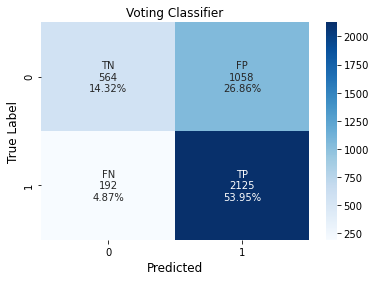

In [129]:
cf_matrix = confusion_matrix(y_test, voting_pred)
make_confusion_matrix(cf_matrix, 'Voting Classifier')

### ROC-AUC

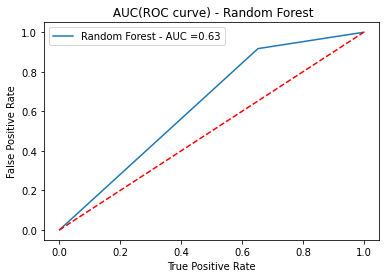

In [130]:
voting_pred_enc = le.fit_transform(voting_pred).astype('bool')
plot_roc_curve(y_test_enc, voting_pred_enc, 'Random Forest')